In [2]:
import pandas as pd
import numpy as np
import sys, os

In [30]:
#Pre-process the dataset
input_path='/fastscratch/c-panz/2021-09-13'
output_path='/pod/2/li-lab/Ziwei/Nanopore/daily/2021-09-14'

df_T4=pd.read_csv(os.path.join(input_path, 'T4.Megalodon.per_read.prob.bed'), sep='\t')
df_T4

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob
0,KJ477685.1,204,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.435397,0.085058,0.479545
1,KJ477685.1,261,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.342189,0.500821,0.156990
2,KJ477685.1,261,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.577034,0.057676,0.365290
3,KJ477685.1,266,3e547b1a-0a3e-4475-9b70-0cbd7c8c82aa,-,0.065316,0.861569,0.073115
4,KJ477685.1,266,fe8be0cc-f4c4-49f1-80db-c840a6c7dfe9,-,0.794235,0.028885,0.176880
...,...,...,...,...,...,...,...
2072,KJ477685.1,164766,570869d4-bfd7-4d9a-9dab-23c5a5bd9e47,-,0.033854,0.029737,0.936408
2073,KJ477685.1,164790,05eb1b57-0c8d-4aa7-a5d9-55d6d6e2a1dc,-,0.063935,0.909510,0.026555
2074,KJ477685.1,164790,15dee92a-3e70-4006-a39b-59dc75c9f169,-,0.067223,0.171466,0.761311
2075,KJ477685.1,164790,436ab228-8780-4633-bace-dec5903849c4,-,0.144235,0.709570,0.146195


In [4]:
df_T4[df_T4['5hmC_prob'] <= 0 ]

,chr,start,read_id,strand,5hmC_prob,5mC_prob,5C_prob


In [30]:
np.log10(1)

0.0

In [84]:
x=df_T4['5hmC_prob']
x= x.astype(float)
x = np.log10(x)
x.max(),x.min()

(-1.8482840270258503e-06, -3.509423795933006)

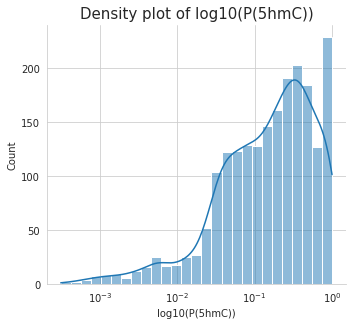

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

#https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
sns.set_style("whitegrid")  # Setting style(Optional)
#plt.figure(figsize = (12,10)) #Specify the size of figure we want(Optional)
sns.displot(x = df_T4['5hmC_prob'], log_scale = True, kde = True)
plt.title('Density plot of log10(P(5hmC))', fontsize= 15)
plt.xlabel('log10(P(5hmC))')
plt.subplots_adjust(top=0.85)

plt.savefig(os.path.join(output_path,'density_plot_log10_P5hmC.png'),
           dpi=100)

plt.show()